## Obtener la data de ambos archivos 2022 y 2023

In [ ]:
# data processing
import pandas as pd

# Load the data
data1 = pd.read_csv("https://raw.githubusercontent.com/LuizIgnacio2002/blockColab/main/ad_viz_plotval_data%20(6).csv")
data2 = pd.read_csv("https://raw.githubusercontent.com/LuizIgnacio2002/blockColab/main/ad_viz_plotval_data%20(7).csv")

# Print the number of rows in each file
print(f"Number of rows in data1: {len(data1)}")
print(f"Number of rows in data2: {len(data2)}")

# Combine the data
data_df = pd.concat([data1, data2], ignore_index=True)

# Print the number of rows in the combined file
print(f"Number of rows in combined data: {len(data_df)}")

# Save the sorted combined data to a new CSV file
data_df.to_csv("./sample_data/combined_ad_viz_plotval_data.csv", index=False)


Number of rows in data1: 358
Number of rows in data2: 359
Number of rows in combined data: 717


# Instalando paquetes

In [ ]:
# Algebra Lineal
import numpy as np

# procesamiento de datos
import pandas as pd

# Visualización de datos
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# algorithms
from sklearn.linear_model import LinearRegression

## Explorando los datos

Podemos ver que el dataset presenta como variable a "Date", por lo que debemos tener cuidado al momento de hacer el split

In [ ]:
data_df.head(10)

,Date,Source,Site ID,POC,Daily Max 8-hour CO Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,...,AQS Parameter Description,Method Code,CBSA Code,CBSA Name,State FIPS Code,State,County FIPS Code,County,Site Latitude,Site Longitude
0,01/01/2022,AQS,10730023,2,0.1,ppm,1,North Birmingham,19,79.0,...,Carbon monoxide,93,13820,"Birmingham-Hoover, AL",1,Alabama,73,Jefferson,33.553056,-86.815
1,01/02/2022,AQS,10730023,2,0.2,ppm,2,North Birmingham,24,100.0,...,Carbon monoxide,93,13820,"Birmingham-Hoover, AL",1,Alabama,73,Jefferson,33.553056,-86.815
2,01/03/2022,AQS,10730023,2,0.2,ppm,2,North Birmingham,12,50.0,...,Carbon monoxide,93,13820,"Birmingham-Hoover, AL",1,Alabama,73,Jefferson,33.553056,-86.815
3,01/04/2022,AQS,10730023,2,0.2,ppm,2,North Birmingham,4,17.0,...,Carbon monoxide,93,13820,"Birmingham-Hoover, AL",1,Alabama,73,Jefferson,33.553056,-86.815
4,01/05/2022,AQS,10730023,2,0.5,ppm,6,North Birmingham,9,38.0,...,Carbon monoxide,93,13820,"Birmingham-Hoover, AL",1,Alabama,73,Jefferson,33.553056,-86.815
5,01/06/2022,AQS,10730023,2,0.6,ppm,7,North Birmingham,24,100.0,...,Carbon monoxide,93,13820,"Birmingham-Hoover, AL",1,Alabama,73,Jefferson,33.553056,-86.815
6,01/07/2022,AQS,10730023,2,0.3,ppm,3,North Birmingham,24,100.0,...,Carbon monoxide,93,13820,"Birmingham-Hoover, AL",1,Alabama,73,Jefferson,33.553056,-86.815
7,01/08/2022,AQS,10730023,2,0.3,ppm,3,North Birmingham,24,100.0,...,Carbon monoxide,93,13820,"Birmingham-Hoover, AL",1,Alabama,73,Jefferson,33.553056,-86.815
8,01/09/2022,AQS,10730023,2,0.2,ppm,2,North Birmingham,24,100.0,...,Carbon monoxide,93,13820,"Birmingham-Hoover, AL",1,Alabama,73,Jefferson,33.553056,-86.815
9,01/10/2022,AQS,10730023,2,0.2,ppm,2,North Birmingham,12,50.0,...,Carbon monoxide,93,13820,"Birmingham-Hoover, AL",1,Alabama,73,Jefferson,33.553056,-86.815


Asegurarnos de que las fechas estén correctamente ordenadas garantiza que el proceso de división del dataset sea coherente y que los datos de entrenamiento y prueba reflejen la progresión temporal real. Esto es especialmente importante en análisis basados en series temporales, donde el orden de los datos puede afectar los resultados del modelo.

In [ ]:
print(type(data_df['Date'][0]))

<class 'str'>


In [ ]:
print(data_df['Date'].head())

0    01/01/2022
1    01/02/2022
2    01/03/2022
3    01/04/2022
4    01/05/2022
Name: Date, dtype: object


In [ ]:
data_df['Date'] = pd.to_datetime(data_df['Date'])

In [ ]:
print(type(data_df['Date'][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [ ]:
print(data_df['Date'].head())

0   2022-01-01
1   2022-01-02
2   2022-01-03
3   2022-01-04
4   2022-01-05
Name: Date, dtype: datetime64[ns]


In [ ]:
import pandas as pd

# Ordenar el DataFrame por la columna de fecha
data_df = data_df.sort_values(by='Date')

# Verifica la ordenación
print(data_df['Date'].head())


0   2022-01-01
1   2022-01-02
2   2022-01-03
3   2022-01-04
4   2022-01-05
Name: Date, dtype: datetime64[ns]


In [ ]:
import pandas as pd

# Assuming df is your DataFrame
rows_to_print = [0, 1, 2, 3, 356, 357, 358, 714, 715, 716]

# Print the 'Date' column for the selected rows
print(data_df.loc[rows_to_print, 'Date'])

0     2022-01-01
1     2022-01-02
2     2022-01-03
3     2022-01-04
356   2022-12-30
357   2022-12-31
358   2023-01-01
714   2023-12-29
715   2023-12-30
716   2023-12-31
Name: Date, dtype: datetime64[ns]


## Separando el dataset en training y test

In [ ]:
import pandas as pd

# Determina el índice para el 80% de entrenamiento y 20% de prueba
split_index = int(len(data_df) * 0.8)

# Divide el DataFrame en entrenamiento y prueba basado en el índice
train_df = data_df[:split_index]
test_df = data_df[split_index:]

A continuación seguiremos trabajando con train_df, nuestro dataset de entrenamiento

## Tratamiento de días faltantes

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573 entries, 0 to 572
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Date                               573 non-null    datetime64[ns]
 1   Source                             573 non-null    object        
 2   Site ID                            573 non-null    int64         
 3   POC                                573 non-null    int64         
 4   Daily Max 8-hour CO Concentration  573 non-null    float64       
 5   Units                              573 non-null    object        
 6   Daily AQI Value                    573 non-null    int64         
 7   Local Site Name                    573 non-null    object        
 8   Daily Obs Count                    573 non-null    int64         
 9   Percent Complete                   573 non-null    float64       
 10  AQS Parameter Code                 573

Podemos notar que el contenido ya se encuentra ordenado de forma creciente en días. Sin embargo, observamos que hay días que no se encuentran dentro del dataset, dado que es la data de 2 años debería haber 365x2 = 730 días, pero vemos solo 717 días(ver indíce o cantidad de filas). Por ejemplo:

El dataset contiene fechas como 01/01/2022, 01/02/2022, hasta 12/31/2023, pero parece que hay días faltantes entre estos rangos. Esto puede indicar que algunos días no se registraron datos.

In [ ]:
import pandas as pd

# Create a complete date range for the period covered in the DataFrame
full_date_range = pd.date_range(start=train_df['Date'].min(), end=train_df['Date'].max())

# Find the missing dates by comparing the full range with the existing dates
missing_dates = full_date_range.difference(train_df['Date'])

# Display the missing dates
print("Fechas faltantes en el conjunto de entrenamiento:")
print(missing_dates)


Fechas faltantes en el conjunto de entrenamiento:
DatetimeIndex(['2022-06-03', '2022-06-04', '2022-06-05', '2022-06-10',
               '2022-06-11', '2022-07-10', '2022-08-21', '2023-03-17',
               '2023-03-18', '2023-03-19'],
              dtype='datetime64[ns]', freq=None)


Para completar las fechas faltantes llenaremos hacia adelante los valores faltantes de concentración de CO con el último valor observado para así mantener la tendencia en los datos

In [ ]:
# Create a complete date range for the period covered in the DataFrame
full_date_range = pd.date_range(start=train_df['Date'].min(), end=train_df['Date'].max())

# Reindex the DataFrame to include all dates in the full range
train_df = train_df.set_index('Date').reindex(full_date_range).reset_index()

# Rename the 'index' column back to 'Date'
train_df.rename(columns={'index': 'Date'}, inplace=True)

# Imputación en el conjunto de entrenamiento utilizando forward fill
train_df.fillna(method='ffill', inplace=True)

# Display the missing dates after reindexing and imputing
missing_dates_after_imputation = train_df[train_df.isnull().any(axis=1)]
print("Fechas con valores faltantes después de la imputación (debería estar vacío):")
print(missing_dates_after_imputation)


Fechas con valores faltantes después de la imputación (debería estar vacío):
Empty DataFrame
Columns: [Date, Source, Site ID, POC, Daily Max 8-hour CO Concentration, Units, Daily AQI Value, Local Site Name, Daily Obs Count, Percent Complete, AQS Parameter Code, AQS Parameter Description, Method Code, CBSA Code, CBSA Name, State FIPS Code, State, County FIPS Code, County, Site Latitude, Site Longitude]
Index: []

[0 rows x 21 columns]


<ipython-input-26-a0183b816872>:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train_df.fillna(method='ffill', inplace=True)


In [ ]:
import pandas as pd

# Assuming df is your DataFrame
rows_to_print = [0, 1, 2, 3, 364, 365, 366]

# Print the 'Date' column for the selected rows
print(train_df.loc[rows_to_print, 'Date'])



0     2022-01-01
1     2022-01-02
2     2022-01-03
3     2022-01-04
364   2022-12-31
365   2023-01-01
366   2023-01-02
Name: Date, dtype: datetime64[ns]


## Data Exploration/Analysis

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Date                               583 non-null    datetime64[ns]
 1   Source                             583 non-null    object        
 2   Site ID                            583 non-null    float64       
 3   POC                                583 non-null    float64       
 4   Daily Max 8-hour CO Concentration  583 non-null    float64       
 5   Units                              583 non-null    object        
 6   Daily AQI Value                    583 non-null    float64       
 7   Local Site Name                    583 non-null    object        
 8   Daily Obs Count                    583 non-null    float64       
 9   Percent Complete                   583 non-null    float64       
 10  AQS Parameter Code                 583

A continuación una pequeña descripción de cada característica:

Date: Fecha del registro de datos.

Source: Fuente de los datos.

Site ID: Identificador del sitio de monitoreo.

POC: Código de Ocurrencia del Parámetro.

Daily Max 8-hour CO Concentration: Concentración máxima de Monóxido de Carbono (CO) medida durante un período de 8 horas.

Units: Unidades de la concentración de CO.

Daily AQI Value: Valor del Índice de Calidad del Aire (AQI) para el día.

Local Site Name: Nombre del sitio de monitoreo.

Daily Obs Count: Número de observaciones registradas durante el día.

Percent Complete: Porcentaje de completitud de los datos diarios.
AQS Parameter Code: Código del contaminante o parámetro.

AQS Parameter Description: Descripción del parámetro (en este caso, CO).

Method Code: Código del método de medición utilizado para monitorear el CO.

CBSA Code: Código del Área Estadística Basada en Núcleos (CBSA).

CBSA Name: Nombre del Área Estadística Basada en Núcleos.

State FIPS Code: Código FIPS del estado.

State: Nombre del estado.

County FIPS Code: Código FIPS del condado.

County: Nombre del condado.

Site Latitude: Coordenada de latitud del sitio de monitoreo.

Site Longitude: Coordenada de longitud del sitio de monitoreo.







## Procesamiento de datos

Columnas que eliminaremos:


*   POC(Parameter Ocurrence Code):
Este código se utiliza para identificar de manera única un monitor cuando hay más de un dispositivo midiendo el mismo contaminante en un sitio.
*   Source:
La columna 'Source' es constante en el dataset y no tiene un impacto directo en la concentración de CO.
*   Site ID:
Este identificador es más bien una codificación de la ubicación de monitoreo. Aunque es útil para identificar el sitio de medición, no influye en la concentración de CO
*   Local Site Name:
Es un dato descriptivo único que brinda información sobre la ubicación del sitio de monitoreo.
*   Units:
Las unidades de medida de la concentración de CO son constantes y no aportan valor adicional al modelo predictivo.
*   AQS Parameter Code:
Código que identifica el parámetro específico que se está midiendo (en este caso, CO).
*   Method Code:
Código del método de medición utilizado para monitorear el CO. Si bien describe el método de medición, no afecta directamente los valores de concentración de CO
*   CBSA Code:
Código del Área Estadística Basada en Núcleos (Core Based Statistical Area). Esta codificación se refiere a áreas geográficas específicas que no tienen un impacto directo en los valores de CO
*   CBSA Name:
Nombre del Área Estadística Basada en Núcleos, similar a 'CBSA Code'.
*   State FIPS Code:
Código Federal de Procesamiento de Información Estándar para el Estado. Es constante dentro del dataset y no tiene efecto sobre la concentración de CO
*   County:
Nombre del condado. Similar a 'State FIPS Code', es descriptivo y no afecta directamente la concentración de CO
*   State:
Nombre del estado. Al igual que con 'County'
*  County FIPS Code:
Código FIPS del condado. Dado que es un identificador constante en el dataset, no aporta información adicional
*   Site Latitude y Site Longitude:
Las coordenadas geográficas representan la ubicación del sitio de monitoreo, que es constante en el dataset.




In [ ]:
# Lista de columnas a eliminar
columns_to_drop = [
    "POC", "Source", "Site ID", "Local Site Name", "Units",
    "AQS Parameter Code", "Method Code", "State", "AQS Parameter Description", "CBSA Code", "CBSA Name",
    "State FIPS Code", "County", "County FIPS Code", "Site Latitude", "Site Longitude"
]

# Eliminar las columnas del DataFrame
train_df = train_df.drop(columns=columns_to_drop)


Vemos con que datos nos hemos quedado

In [ ]:
train_df.head(5)

,Date,Daily Max 8-hour CO Concentration,Daily AQI Value,Daily Obs Count,Percent Complete
0,2022-01-01,0.1,1,19,79.0
1,2022-01-02,0.2,2,24,100.0
2,2022-01-03,0.2,2,12,50.0
3,2022-01-04,0.2,2,4,17.0
4,2022-01-05,0.5,6,9,38.0


In [ ]:
train_df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,573,2022-10-19 16:00:00,2022-01-01 00:00:00,2022-05-24 00:00:00,2022-10-21 00:00:00,2023-03-13 00:00:00,2023-08-06 00:00:00,NaN
Daily Max 8-hour CO Concentration,573.0,0.310646,0.1,0.2,0.3,0.4,2.6,0.194618
Daily AQI Value,573.0,3.403141,1.0,2.0,3.0,5.0,30.0,2.385077
Daily Obs Count,573.0,22.101222,4.0,24.0,24.0,24.0,24.0,4.020518
Percent Complete,573.0,92.113438,17.0,100.0,100.0,100.0,100.0,16.70589


Now we are going to plot the Date vs Daily Max 8-hour CO Concentration

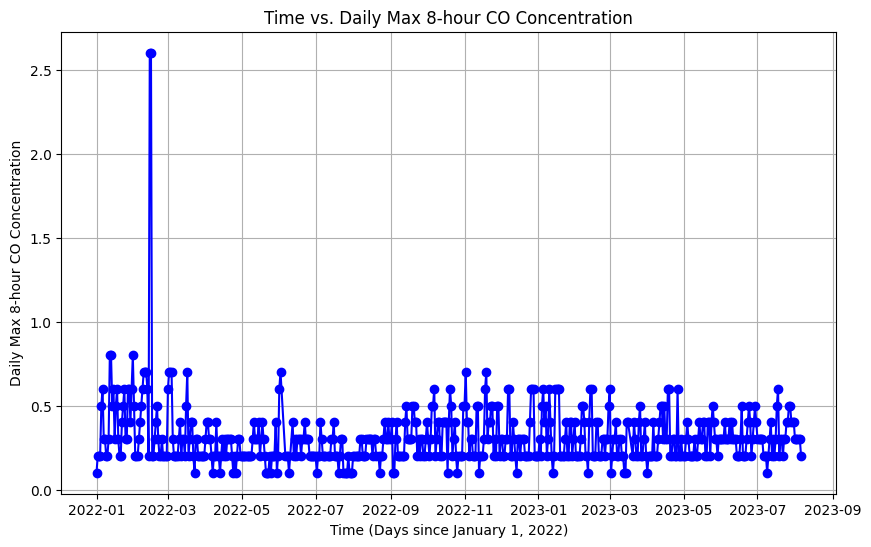

In [ ]:
import matplotlib.pyplot as plt

# Plotting Time vs. Daily Max 8-hour CO Concentration
plt.figure(figsize=(10, 6))
#plt.plot(train_df['Time'], train_df['Daily Max 8-hour CO Concentration'], marker='o', linestyle='-', color='b')
plt.plot(train_df['Date'], train_df['Daily Max 8-hour CO Concentration'], marker='o', linestyle='-', color='b')
plt.title('Time vs. Daily Max 8-hour CO Concentration')
plt.xlabel('Time (Days since January 1, 2022)')
plt.ylabel('Daily Max 8-hour CO Concentration')
plt.grid(True)
plt.show()


In [ ]:
# Find the row with the highest CO concentration
max_row = train_df.loc[train_df['Daily Max 8-hour CO Concentration'].idxmax()]

# Extract the date and the maximum concentration
max_date = max_row['Date']
max_concentration = max_row['Daily Max 8-hour CO Concentration']

# Print the result
print(f"The highest CO concentration is {max_concentration} and it occurred on {max_date}.")


The highest CO concentration is 2.6 and it occurred on 2022-02-14 00:00:00.


## Buscando Correlaciones

La correlación indica la fuerza y dirección de una relación lineal entre dos variables. Una correlación alta (cercana a 1 o -1) sugiere que una variable puede ser un buen predictor de la otra.

In [ ]:
# Selecciona las columnas numéricas del DataFrame train_df
numeric_columns = train_df.select_dtypes(include=[np.number])

# Calcula la matriz de correlación de las columnas numéricas
corr_matrix = numeric_columns.corr()

# Ordena las correlaciones de la columna 'median_house_value' en orden descendente
corr_matrix["Daily Max 8-hour CO Concentration"].sort_values(ascending=False)


,Daily Max 8-hour CO Concentration
Daily Max 8-hour CO Concentration,1.000000
Daily AQI Value,0.993715
Daily Obs Count,-0.029979
Percent Complete,-0.030108


El valor diario del AQI tiene una correlación positiva muy alta (0.993743) con la concentración máxima diaria de CO en 8 horas. Esto indica que, a medida que aumenta la concentración máxima diaria de CO en 8 horas, el Índice de Calidad del Aire (AQI) también tiende a aumentar significativamente. Esto tiene sentido porque el AQI a menudo se deriva de las concentraciones de contaminantes como el CO.

## Usando TimeFeatureAdder Class

Usando Time-step features para el manejo de fechas, añadimos valores secuenciales a las fechas 0, 1, 2, 3, ... en una columna Time

Primero, crearemos una clase de transformador que calcule la característica de Tiempo basada en la fecha de inicio que especifiques.

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
import pandas as pd

class TimeFeatureAdder(BaseEstimator, TransformerMixin):
    def __init__(self, start_date):
        self.start_date = pd.to_datetime(start_date)

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original data
        X['Date'] = pd.to_datetime(X['Date'])  # Ensure 'Date' column is datetime
        X['Time'] = (X['Date'] - self.start_date).dt.days
        return X


Ejemplo de TimeFeatureAdder

In [ ]:
import pandas as pd

# Sample data
example_data = {
    'Date': ['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04', '2022-01-05'],
    'Daily AQI Value': [1.0, 2.0, 2.0, 2.0, 6.0],
    'other_features': [19.0, 24.0, 12.0, 4.0, 9.0]
}

# Initialize the transformer with the start date
start_date = '2022-01-01'
time_adder = TimeFeatureAdder(start_date=start_date)

# Create DataFrame
example_df = pd.DataFrame(example_data)
# Apply the transformer to the sample data
transformed_example_df = time_adder.transform(example_df)

# Print the first five examples
print(transformed_example_df.head())

        Date  Daily AQI Value  other_features  Time
0 2022-01-01              1.0            19.0     0
1 2022-01-02              2.0            24.0     1
2 2022-01-03              2.0            12.0     2
3 2022-01-04              2.0             4.0     3
4 2022-01-05              6.0             9.0     4


## Initialize the Transformer with the Start Date

In [ ]:
# Initialize the transformer with the start date
start_date = '2022-01-01'
time_adder = TimeFeatureAdder(start_date=start_date)


In [ ]:
# Apply the transformer to your training data
X_train = train_df[['Date', 'Daily AQI Value']]
X_train = time_adder.transform(X_train)

y_train = train_df['Daily Max 8-hour CO Concentration']

# Apply the transformer to your testing data
X_test = test_df[['Date', 'Daily AQI Value']]
X_test = time_adder.transform(X_test)

y_test = test_df['Daily Max 8-hour CO Concentration']


In [ ]:
import pandas as pd
import pickle

# Train the linear regression model
model = LinearRegression()
model.fit(X_train[['Time', 'Daily AQI Value']], y_train)

# Predict and evaluate
predictions = model.predict(X_test[['Time', 'Daily AQI Value']])

# Create a DataFrame to hold the Date, Time, Daily AQI Value, Actual Concentration, and Predictions
results_df = pd.DataFrame({
    'Date': X_test['Date'],  # Date from the test set
    'Time': X_test['Time'],  # Time from the test set
    'Daily AQI Value': X_test['Daily AQI Value'],  # Daily AQI Value from the test set
    'Actual Concentration': y_test,  # Actual Concentration from the test set
    'Predicted Concentration': predictions  # Predictions from the model
})

# Set display options for better formatting
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', 1000)  # Set the width for better readability
pd.set_option('display.float_format', '{:.8f}'.format)  # Format floating-point numbers

# Print the DataFrame
print(results_df.head(5))  # Print the first 10 rows for brevity

# Save the trained model as a pickle file
with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)


          Date  Time  Daily AQI Value  Actual Concentration  Predicted Concentration
573 2023-08-07   583                3            0.30000000               0.27437275
574 2023-08-08   584                5            0.40000000               0.43643077
575 2023-08-09   585                5            0.40000000               0.43641840
576 2023-08-10   586                2            0.20000000               0.19330045
577 2023-08-11   587                3            0.30000000               0.27432327


Métricas

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
r2 = r2_score(y_test, predictions)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error(Error Cuadrático medio): {rmse}")
print(f"R-squared: {r2}")


Mean Absolute Error: 0.02304062948371023
Mean Squared Error: 0.0006727425782464749
Root Mean Squared Error(Error Cuadrático medio): 0.025937281627928455
R-squared: 0.958765658412347


Error Absoluto Medio (MAE): 0.0231

En este caso, en promedio, las predicciones del modelo se desvían en aproximadamente 0.0231 unidades del valor real de la Concentración Máxima Diaria de CO en 8 horas. Esto indica que las predicciones están bastante cerca de los valores reales.

Error Cuadrático Medio (MSE): 0.00067

El Error Cuadrático Medio es el promedio de las diferencias al cuadrado entre los valores predichos y los reales. Un MSE de 0.00067 sugiere que los errores son, en general, muy pequeños.

Raíz del Error Cuadrático Medio (RMSE): 0.0259

La Raíz del Error Cuadrático Medio es la raíz cuadrada del MSE. Un RMSE de 0.0259 indica que la magnitud típica del error es pequeña, lo que sugiere un buen rendimiento del modelo.

Coeficiente de Determinación (R²): 0.959

El coeficiente de determinación mide la proporción de la varianza en la variable dependiente (Concentración Máxima Diaria de CO en 8 horas) que es predecible a partir de las variables independientes (Tiempo y Valor Diario del AQI). Un valor de R² de 0.959 significa que aproximadamente el 95.9% de la variabilidad en la concentración de CO es explicada por tu modelo. Esto indica que tu modelo tiene un ajuste fuerte con los datos.

In [ ]:
import pandas as pd
import pickle
from datetime import datetime

# Cargando el modelo
with open('linear_regression_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Definiendo la fecha de iniio
start_date = '2022-01-01'  # start date
time_feature_adder = TimeFeatureAdder(start_date=start_date)

# Colocando datos de forma manual
manual_data = {
    'Date': ['2024-08-26'],
    'Daily AQI Value': [1]
}

manual_input_df = pd.DataFrame(manual_data)

manual_input_df = time_feature_adder.transform(manual_input_df)

manual_prediction = loaded_model.predict(manual_input_df[['Time', 'Daily AQI Value']])

manual_results_df = pd.DataFrame({
    'Date': manual_input_df['Date'],  # Manual Date input
    'Time': manual_input_df['Time'],  # Calculated Time based on Date
    'Daily AQI Value': manual_input_df['Daily AQI Value'],  # Manual Daily AQI Value input
    'Predicted Concentration': manual_prediction  # Prediction from the loaded model
})

pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', 1000)  # Set the width for better readability
pd.set_option('display.float_format', '{:.8f}'.format)  # Format floating-point numbers

print(manual_results_df)


        Date  Time  Daily AQI Value  Predicted Concentration
0 2024-08-26   968                1               0.10753921
